In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font',family = 'Malgun Gothic')


In [2]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
print(breast_cancer.feature_names)
print(breast_cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
#P(Y=1) : 유방암일 확률 P(Y=0) : 유방암이 아닐 확률
# class{'1':'malignant','0':'benign'}
# 편의상 Y = 1 일때 유방암으로 바꾼다(원 데이터는 0이 유방암)
# np.where() 조건문
breast_cancer.target = np.where(breast_cancer.target == 0,1,0)

In [6]:
# 데이터 전처리 
X_train,X_test,y_trian,y_test = train_test_split(breast_cancer.data,breast_cancer.target,test_size=0.3,random_state=202)
# 정규화
nomalizer = StandardScaler()
X_train = nomalizer.fit_transform(X_train)
X_test = nomalizer.fit_transform(X_test)

In [7]:
# 로지스틱 회귀모델 구축
model = LogisticRegression()
model.fit(X_train,y_trian)

LogisticRegression()

In [8]:
# 데이터 칼럼에 따른 beta,exp(beta) 체크
column_name = ['const']+breast_cancer.feature_names.tolist()
beta = np.concatenate([model.intercept_,model.coef_.reshape(-1)]).round(2)
odds = np.exp(beta).round(2)
interpret = np.where(beta>0,'risky','protective')
interpret

array(['protective', 'risky', 'risky', 'risky', 'risky', 'risky',
       'protective', 'risky', 'risky', 'risky', 'protective', 'risky',
       'risky', 'risky', 'risky', 'risky', 'protective', 'protective',
       'risky', 'protective', 'protective', 'risky', 'risky', 'risky',
       'risky', 'risky', 'risky', 'risky', 'risky', 'risky', 'risky'],
      dtype='<U10')

In [9]:
#beta 해석 정리
beta_analysis = pd.DataFrame(np.c_[beta,odds,interpret],index=column_name,columns=['beta','exp(beta)','interpret'])
beta_analysis

,beta,exp(beta),interpret
const,-0.31,0.73,protective
mean radius,0.56,1.75,risky
mean texture,0.37,1.45,risky
mean perimeter,0.54,1.72,risky
mean area,0.62,1.86,risky
mean smoothness,0.01,1.01,risky
mean compactness,-0.5,0.61,protective
mean concavity,0.62,1.86,risky
mean concave points,0.84,2.32,risky
mean symmetry,0.03,1.03,risky


In [10]:
# X_test 적용
model.predict_proba(X_test)

array([[9.98699993e-01, 1.30000694e-03],
       [9.02794358e-04, 9.99097206e-01],
       [9.99890813e-01, 1.09186891e-04],
       [8.76196293e-01, 1.23803707e-01],
       [1.37223566e-13, 1.00000000e+00],
       [9.97991734e-01, 2.00826627e-03],
       [9.77906920e-01, 2.20930803e-02],
       [2.76889622e-13, 1.00000000e+00],
       [1.10645387e-03, 9.98893546e-01],
       [5.79114562e-06, 9.99994209e-01],
       [9.99790215e-01, 2.09785101e-04],
       [9.99912635e-01, 8.73654674e-05],
       [1.81672031e-05, 9.99981833e-01],
       [9.74009761e-01, 2.59902390e-02],
       [4.10114095e-06, 9.99995899e-01],
       [2.92354098e-01, 7.07645902e-01],
       [9.91400335e-01, 8.59966503e-03],
       [9.99160903e-01, 8.39096941e-04],
       [9.99970029e-01, 2.99712183e-05],
       [7.55347440e-09, 9.99999992e-01],
       [9.58805697e-01, 4.11943027e-02],
       [8.82604814e-04, 9.99117395e-01],
       [4.82093469e-05, 9.99951791e-01],
       [3.24933747e-03, 9.96750663e-01],
       [9.999826

In [11]:
# X_test에 대한 P(Y=0)예측 확률값과 P(Y=1) 예측 확률값 - 직접 계산
#beta 곱하기 계산
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]),X_test],beta.reshape(-1,1))
#P(Y=1) 계산
P_1 = 1/(1+np.exp(-Xbeta))
#패키지와 직접 께산 결과 비교
pd.DataFrame(np.concatenate([P_1,model.predict_proba(X_test)[:,1].reshape(-1,1)],axis=1),columns=['직접','패키지'])

,직접,패키지
0,0.001283,0.001300
1,0.999123,0.999097
2,0.000109,0.000109
3,0.123693,0.123804
4,1.000000,1.000000
...,...,...
166,1.000000,1.000000
167,0.000675,0.000674
168,0.999998,0.999998
169,0.000657,0.000663


In [12]:
#성능 평가하기 
#cut off 값에 따른 혼동행렬 관찰
# 정확도 = TP+TN/TP+FN+FP+TN
# 민감도 = TP/TP+FN
# 정밀도 = TP/TP+FP

In [13]:
Cut_off = np.linspace(0.01,0.99,10) # cut off 값 여러개 만들어두기
for cutoff in Cut_off:
    y_pred = np.where(P_1.reshape(-1)>=cutoff,1,0)
    acc = accuracy_score(y_true=y_test,y_pred=y_pred) # 정확도
    recall = recall_score(y_true= y_test,y_pred= y_pred) # 민감도
    precision = precision_score(y_true=y_test,y_pred=y_pred)
    print(f"정확도:{acc:0.2f}",f"민감도:{recall:0.2f}",f"정밀도:{precision:0.2f}",f"cut off:{cutoff:0.2f}",sep=" | ")

정확도:0.81 | 민감도:1.00 | 정밀도:0.67 | cut off:0.01
정확도:0.94 | 민감도:0.97 | 정밀도:0.89 | cut off:0.12
정확도:0.96 | 민감도:0.97 | 정밀도:0.94 | cut off:0.23
정확도:0.98 | 민감도:0.97 | 정밀도:0.97 | cut off:0.34
정확도:0.98 | 민감도:0.97 | 정밀도:0.97 | cut off:0.45
정확도:0.98 | 민감도:0.95 | 정밀도:1.00 | cut off:0.55
정확도:0.98 | 민감도:0.94 | 정밀도:1.00 | cut off:0.66
정확도:0.96 | 민감도:0.91 | 정밀도:1.00 | cut off:0.77
정확도:0.96 | 민감도:0.89 | 정밀도:1.00 | cut off:0.88
정확도:0.91 | 민감도:0.75 | 정밀도:1.00 | cut off:0.99


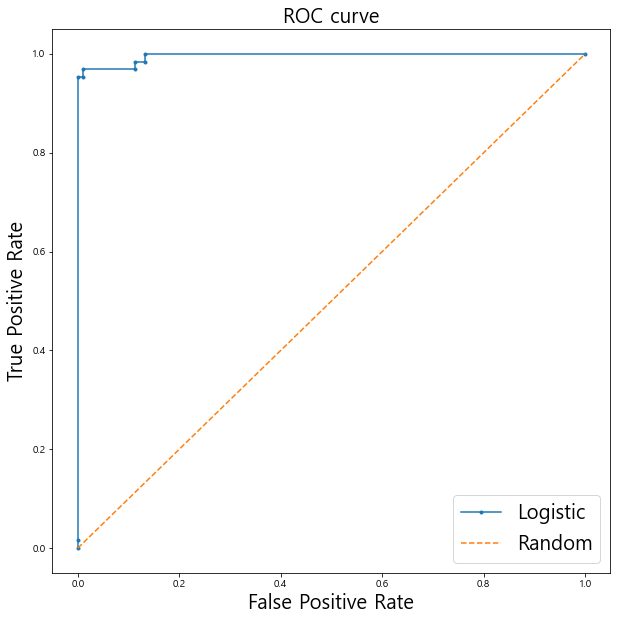

In [14]:
probs = model.predict_proba(X_test)[:,1]

model_fpr,model_tpr,threshold1 = roc_curve(y_test,probs)
random_fpr,random_tpr,threshold2 = roc_curve(y_test,[0 for i in range(X_test.__len__())])

plt.figure(figsize=(10,10))
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic')
plt.plot(random_fpr,random_tpr,linestyle = '--', label = 'Random')

plt.xlabel('False Positive Rate',size = 20)
plt.ylabel('True Positive Rate',size = 20)
plt.legend(fontsize = 20)
plt.title('ROC curve',size = 20)
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score

pred = model.predict(X_test)
roc_score = roc_auc_score(y_test,pred)
print("ROC AUC 값 : {:.4f}".format(roc_score))

ROC AUC 값 : 0.9722
